In [46]:
import pandas as pd # Onur Korkmaz 101303363 T177
import numpy as np
from sklearn import tree

In [4]:
#1 Download the test.csv file and store it in a DataFrame named, myDF.
myDF =pd.DataFrame(pd.read_csv("test.csv"))

In [3]:
#2. Show the first three rows of the DF.
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [6]:
#3. Delete the ‘Model’ column from the DF temporarily.
myDF.drop('Model', axis=1, )

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,[51$],South America
946,9470,316,46,L,SHBAUD,[33$],North America
947,9480,461,46,K,PUZUVO,[12$],Europe
948,9490,185,13,N,UMESZO,[39$],North America


In [ ]:
#4a Is there any output when you run the permanent deletion? 
#There is no any output for model column
#So, how can you make sure it is deleted?
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [7]:
#5. Now, let’s delete rows 1, 3, and 5 permanently, using inplace. Then show the first 4 Rows of myDF.
myDF.drop([1, 3,5 ], axis=0, inplace=True) 
myDF.head(4)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,AAA,NXEYEM,EX85,[56$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
4,50,468,33,J,HPQCMC,QX90,[95$],Africa
6,70,327,24,AAA,NLVQPY,JY72,[25$],Europe


In [8]:
#6 Calculate the mean of ‘Range’ column.
myDF.Range.mean()

297.53326293558604

In [9]:
#7a Replace them permanently with ‘AAA’ and show the first 5 rows.
myDF['Type'].replace({'F':'AAA'}, inplace=True)

In [10]:
myDF.head()

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,AAA,NXEYEM,EX85,[56$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
4,50,468,33,J,HPQCMC,QX90,[95$],Africa
6,70,327,24,AAA,NLVQPY,JY72,[25$],Europe
7,80,495,50,Z,DLUMAX,DU50,[70$],Antarctica


In [11]:
#8 Get rid of the [, $ and ] from the ‘Cost’ column permanently and display the first 5 rows.
myDF['Cost'].replace("[$,\[,\]]","", inplace=True, regex=True) 

myDF.head()

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,AAA,NXEYEM,EX85,56,Asia
2,30,378,28,X,IMGMFY,VN81,90,North America
4,50,468,33,J,HPQCMC,QX90,95,Africa
6,70,327,24,AAA,NLVQPY,JY72,25,Europe
7,80,495,50,Z,DLUMAX,DU50,70,Antarctica


In [12]:
#8a  What is the type of ‘Cost’ column after this?
type(myDF)

pandas.core.frame.DataFrame

In [13]:
#9. Change the ‘Cost’ column data type to integer and display the result.
myDF['Cost']=myDF['Cost'].astype(int)
myDF.dtypes

ID            int64
Range         int64
Value         int64
Type         object
Zip Code     object
Model        object
Cost          int64
Continent    object
dtype: object

In [14]:
#10. Calculate the average of ‘Cost’ column. 
myDF['Cost'].mean()

54.586061246040124

In [15]:
#Then, calculate the average of ‘Cost’ for each ‘Continent’.

myDF.groupby('Continent')['Cost'].mean().reset_index()

,Continent,Cost
0,Africa,54.741259
1,Antarctica,54.706897
2,Asia,54.279070
3,Australia,56.838028
4,Europe,53.258993
5,North America,55.006993
6,South America,53.162963


In [16]:
#11. Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.
myDF.groupby('Continent').Cost.agg(['min','max','std'])

,min,max,std
Continent,,,
Africa,11,97,25.961432
Antarctica,10,97,24.880590
Asia,10,99,26.109737
Australia,10,97,26.057121
Europe,10,99,26.185054
North America,10,99,25.664821
South America,10,98,25.724780


In [17]:
#12. Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command.
myDF.groupby('Continent').describe(include=[np.number]).loc[:]

ID                                                           \
               count         mean          std    min     25%     50%     75%   
Continent                                                                       
Africa         143.0  4797.692308  2614.387519   50.0  2680.0  4900.0  7115.0   
Antarctica     116.0  4569.310345  2936.313786   80.0  1887.5  4455.0  7330.0   
Asia           129.0  4334.031008  2683.431665   10.0  2040.0  4040.0  6680.0   
Australia      142.0  4677.323944  2793.945560  120.0  2242.5  4590.0  6992.5   
Europe         139.0  5078.848921  2623.991892   70.0  3065.0  4970.0  7295.0   
North America  143.0  4906.783217  2841.216413   30.0  2375.0  4820.0  7580.0   
South America  135.0  4963.851852  2656.186804   90.0  2910.0  5070.0  6975.0   

                       Range              ... Value         Cost             \
                  max  count        mean  ...   75%   max  count       mean   
Continent                                 ...                                 
Africa         9450.0  143.0  282.475524  ...  42.0  50.0  143.0  54.741259   
Antarctica     9370.0  116.0  288.698276  ...  39.0  50.0  116.0  54.706897   
Asia           9390.0  129.0  284.914729  ...  36.0  50.0  129.0  54.279070   
Australia      9410.0  142.0  305.894366  ...  42.0  50.0  142.0  56.838028   
Europe         9480.0  139.0  320.338129  ...  42.0  50.0  139.0  53.258993   
North America  9490.0  143.0  299.832168  ...  42.0  50.0  143.0  55.006993   
South America  9500.0  135.0  298.422222  ...  41.0  50.0  135.0  53.162963   

                                                         
                     std   min    25%   50%   75%   max  
Continent                                                
Africa         25.961432  11.0  34.00  54.0  78.0  97.0  
Antarctica     24.880590  10.0  35.00  59.0  74.0  97.0  
Asia           26.109737  10.0  33.00  54.0  74.0  99.0  
Australia      26.057121  10.0  36.25  56.5  81.0  97.0  
Europe         26.185054  10.0  29.00  54.0  73.0  99.0  
North America  25.664821  10.0  33.50  56.0  78.5  99.0  
South America  25.724780  10.0  31.00  55.0  74.5  98.0  

[7 rows x 32 columns]

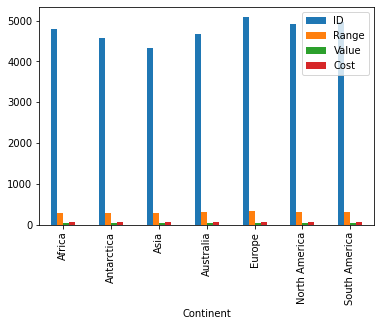

In [18]:
#13. Illustrate the mean of all numerical columns, group by the ‘Continent’, using a ‘bar’ chart.
%matplotlib inline
myDF.groupby('Continent').mean().plot(kind='bar')

In [19]:
#14. Count the number of each continent in the ‘Continent’ column.
myDF.Continent.value_counts()

North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: Continent, dtype: int64

In [20]:
#15. Show the percentage of each continent in the ‘Continent’ column.
myDF.Continent.value_counts(normalize=True)

North America    0.151003
Africa           0.151003
Australia        0.149947
Europe           0.146779
South America    0.142555
Asia             0.136220
Antarctica       0.122492
Name: Continent, dtype: float64

In [21]:
#16. Show the unique values that we have in the ‘Continent’ column. 
myDF.Continent.unique()

array(['Asia', 'North America', 'Africa', 'Europe', 'Antarctica',
       'South America', 'Australia'], dtype=object)

In [22]:
#16a Then show the number of unique values that we have in the ‘Continent’ column.
myDF.Continent.nunique()

7

In [23]:
#Use the value_count method for the ‘Cost’ column and describe the output as a comment in the next cell, using the # for the comment.
myDF.Cost.value_counts().describe()

count    90.000000
mean     10.522222
std       3.589084
min       2.000000
25%       8.000000
50%      11.000000
75%      13.000000
max      20.000000
Name: Cost, dtype: float64

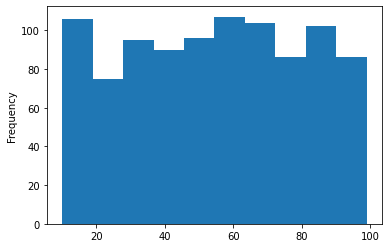

In [24]:
#18 Plot a histogram for the ‘Cost’ column.
%matplotlib inline
myDF.Cost.plot(kind='hist')

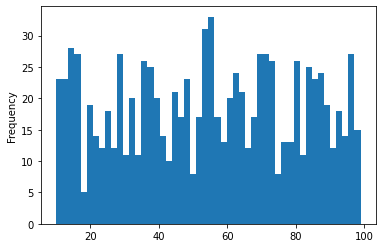

In [25]:

#19. Bonus question: Try to change the number of bins to 50 to show the result more accurately.
myDF.Cost.plot(kind='hist', bins=50)

In [26]:
#20a How many missing values do we have in the ‘Zip Code’ column? 
myDF['Zip Code'].isnull().sum()

9

In [27]:
#20b How many missing values in the ‘Type’ column?
myDF['Type'].isnull().sum()

2

In [28]:
#20c Provide a brief summary of null values for the entire Data Frame.
myDF.isnull().sum().to_frame('nulls')

,nulls
ID,0
Range,0
Value,0
Type,2
Zip Code,9
Model,0
Cost,0
Continent,0


In [29]:
#21. If we drop all the rows that have ‘any’ missing value, how many rows will remain in myDF?
myDF.dropna(how='any').shape

(936, 8)

In [30]:
#22a Show the statistics for the ‘Type’ column using the value_count method, including the NaN values in the list. 
myDF['Type'].value_counts(dropna=False)

AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
NaN     2
Name: Type, dtype: int64

In [31]:
#22b How many missing values do we have? 
#2 missing value in the NaN

In [32]:
#23. Replace the ‘Type’ column missing values with ‘XXX’ and show the result again.
myDF['Type'].fillna(value='XXX', inplace=True)
myDF['Type'].value_counts(dropna=False)

AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
XXX     2
Name: Type, dtype: int64

In [33]:
#24. Drop the rows that have any missing value permanently and show the number of rows after running the drop command.
myDF.dropna(how='any', inplace=True)
myDF.count()

ID           938
Range        938
Value        938
Type         938
Zip Code     938
Model        938
Cost         938
Continent    938
dtype: int64

In [34]:
#25a Set the ‘ID’ column as the new index and delete the index name. 
myDF.set_index('ID', inplace=True)
myDF.index.name=None

In [35]:
#25b Then show the first 5 rows of the DF.
myDF.head()

,Range,Value,Type,Zip Code,Model,Cost,Continent
10,192,50,AAA,NXEYEM,EX85,56,Asia
30,378,28,X,IMGMFY,VN81,90,North America
50,468,33,J,HPQCMC,QX90,95,Africa
70,327,24,AAA,NLVQPY,JY72,25,Europe
80,495,50,Z,DLUMAX,DU50,70,Antarctica


In [36]:
#25c Show the value of the cell that its ID is 70 and its column header is ‘Value’.
myDF.loc[70,'Value']

24

In [37]:
#26a Show the index, columns and the shape of the current DF.
myDF.index, myDF.columns, myDF.shape

(Int64Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
             ...
             9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
            dtype='int64', length=938),
 Index(['Range', 'Value', 'Type', 'Zip Code', 'Model', 'Cost', 'Continent'], dtype='object'),
 (938, 7))

In [38]:
#26b Bring back the ID column to the DF and reset the index. 
myDF.index.name='ID'
myDF.reset_index(inplace=True)

In [39]:
#26c Again, show the index, columns and the shape of the current DF.
myDF.index, myDF.columns, myDF.shape

(RangeIndex(start=0, stop=938, step=1),
 Index(['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Model', 'Cost',
        'Continent'],
       dtype='object'),
 (938, 8))

In [40]:
#27. Use the describe method to see the statistics of myDF and fetch the value of the first row and the third column of the result.
myDF.describe()

,ID,Range,Value,Cost
count,938.000000,938.000000,938.000000,938.000000
mean,4749.104478,297.531983,29.917910,54.611940
std,2739.076928,115.913345,12.292447,25.742149
min,10.000000,100.000000,10.000000,10.000000
25%,2382.500000,194.000000,19.000000,33.000000
50%,4725.000000,295.000000,30.000000,55.000000
75%,7097.500000,400.000000,41.000000,76.000000
max,9500.000000,500.000000,50.000000,99.000000


In [41]:
myDF.describe().iloc[0,2]

938.0

In [44]:
#28a Sort the value_counts() of the ‘Continent’ column of the DF.Then, sort the value_counts() of the ‘Continent’ column, based on the alphabetic order of the continents.

myDF.Continent.value_counts(), "***************************", myDF.Continent.value_counts().sort_values()

(North America    141
 Australia        141
 Africa           139
 Europe           138
 South America    135
 Asia             129
 Antarctica       115
 Name: Continent, dtype: int64,
 '***************************',
 Antarctica       115
 Asia             129
 South America    135
 Europe           138
 Africa           139
 North America    141
 Australia        141
 Name: Continent, dtype: int64)

In [43]:
#29. Show all the columns of the following rows in one command. [1,3,5,7] and show the first 7 rows of the following columns: ‘Type’ and ‘Continent’

myDF.loc[[1,3,5,7], :], "*********************************",  myDF.loc[0:6,['Type', 'Continent']]

(    ID  Range  Value Type Zip Code Model  Cost      Continent
 1   30    378     28    X   IMGMFY  VN81    90  North America
 3   70    327     24  AAA   NLVQPY  JY72    25         Europe
 5   90    115     30    S   KYJUHA  JZ93    17  South America
 7  110    301     29    A   OVINZU  SM29    69  South America,
 '*********************************',
   Type      Continent
 0  AAA           Asia
 1    X  North America
 2    J         Africa
 3  AAA         Europe
 4    Z     Antarctica
 5    S  South America
 6    K  South America)

In [45]:
#30. Show the ‘Value’ of the ‘Type’ that are equal to ’XXX’.
myDF.loc[myDF.Type=='XXX','Value']

687    42
743    37
Name: Value, dtype: int64